In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [7]:
t_fluxes_path_unburned = 'unburned/T_fluxes  1  1.dat'
t_water_path_unburned='unburned/water_temp  1  1f2.dat'
sal_water_path_unburned='unburned/sal_water  1  1f2.dat'
t_soil_path_unburned='unburned/soil_temp  1  1f2.dat'
layers_path_unburned='unburned/layers  1  1.dat'
ch4_path_unburned='unburned/methane_water  1  1f2.dat'
co2_path_unburned='unburned/co2_water  1  1f2.dat'
do_path_unburned='unburned/oxygen_water  1  1f2.dat'
po_path_unburned = 'unburned/phosph_water  1  1f2.dat'

t_fluxes_path_burned = 'burned/T_fluxes  1  1.dat'
t_water_path_burned='burned/water_temp  1  1f2.dat'
sal_water_path_burned='burned/sal_water  1  1f2.dat'
t_soil_path_burned='burned/soil_temp  1  1f2.dat'
layers_path_burned='burned/layers  1  1.dat'
ch4_path_burned='burned/methane_water  1  1f2.dat'
co2_path_burned='burned/co2_water  1  1f2.dat'
do_path_burned='burned/oxygen_water  1  1f2.dat'
po_path_burned = 'burned/phosph_water  1  1f2.dat'

In [8]:
path_to_unburned_co2_obs = '../../data/raw/UB_Pond_CO2_062622-072822.csv'
path_to_burned_co2_obs = '../../data/raw/Burned_Pond_CO2_062422-081622.csv'
path_to_ch4_obs = '../../data/raw/Pond_Env_For_Elchin.xlsx'

In [9]:
twater_burned=pd.read_csv(t_water_path_burned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
twater_burned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 't_water']
twater_burned['datetime'] = pd.to_datetime({'Year': twater_burned['year'], 'Month': twater_burned['month'], 'Day':twater_burned['day']})

twater_unburned=pd.read_csv(t_water_path_unburned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
twater_unburned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 't_water']
twater_unburned['datetime'] = pd.to_datetime({'Year': twater_unburned['year'], 'Month': twater_unburned['month'], 'Day':twater_unburned['day']})

In [10]:
sal_water_burned=pd.read_csv(sal_water_path_burned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
sal_water_burned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 'sal_water']
sal_water_burned['datetime'] = pd.to_datetime({'Year': sal_water_burned['year'], 'Month': sal_water_burned['month'], 'Day':sal_water_burned['day']})

sal_water_unburned=pd.read_csv(sal_water_path_unburned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
sal_water_unburned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 'sal_water']
sal_water_unburned['datetime'] = pd.to_datetime({'Year': sal_water_unburned['year'], 'Month': sal_water_unburned['month'], 'Day':sal_water_unburned['day']})

In [11]:
tsoil_burned=pd.read_csv(t_soil_path_burned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
tsoil_burned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 't_soil']
tsoil_burned['datetime'] = pd.to_datetime({'Year': tsoil_burned['year'], 'Month': tsoil_burned['month'], 'Day':tsoil_burned['day']})

tsoil_unburned=pd.read_csv(t_soil_path_unburned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
tsoil_unburned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 't_soil']
tsoil_unburned['datetime'] = pd.to_datetime({'Year': tsoil_unburned['year'], 'Month': tsoil_unburned['month'], 'Day':tsoil_unburned['day']})

In [12]:
layers_burned=pd.read_csv(layers_path_burned, delimiter=r"\s+", skiprows=19, index_col=None, header=None)
layers_burned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'water layer thickness, m', 
                       'W mixed layer thickness, m', 'E mixed layer thickness, m', 'S mixed layer thickness, m', 'N mixed layer thickness, m',
                       'W lower layer thickness, m', 'E lower layer thickness, m', 'S lower layer thickness, m', 'N lower layer thickness, m',
                       'ice layer thickness,   m', 'snow layer thickness,  m', 'bottom ice thickness,  m', 'reservoir volume,  m**3', 'volume deficit (accumulated),  m**3']
layers_burned['datetime'] = pd.to_datetime({'Year': layers_burned['year'], 'Month': layers_burned['month'], 'Day':layers_burned['day']})
layers_burned['mean_mixed_layer_thickness'] = layers_burned[['W mixed layer thickness, m', 'E mixed layer thickness, m', 'S mixed layer thickness, m', 'N mixed layer thickness, m']].mean(axis=1)
layers_burned['mean_lower_layer_thickness'] = layers_burned[['W lower layer thickness, m', 'E lower layer thickness, m', 'S lower layer thickness, m', 'N lower layer thickness, m',]].mean(axis=1)

layers_unburned=pd.read_csv(layers_path_unburned, delimiter=r"\s+", skiprows=19, index_col=None, header=None)
layers_unburned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'water layer thickness, m', 
                       'W mixed layer thickness, m', 'E mixed layer thickness, m', 'S mixed layer thickness, m', 'N mixed layer thickness, m',
                       'W lower layer thickness, m', 'E lower layer thickness, m', 'S lower layer thickness, m', 'N lower layer thickness, m',
                       'ice layer thickness,   m', 'snow layer thickness,  m', 'bottom ice thickness,  m', 'reservoir volume,  m**3', 'volume deficit (accumulated),  m**3']
layers_unburned['datetime'] = pd.to_datetime({'Year': layers_unburned['year'], 'Month': layers_unburned['month'], 'Day':layers_unburned['day']})
layers_unburned['mean_mixed_layer_thickness'] = layers_unburned[['W mixed layer thickness, m', 'E mixed layer thickness, m', 'S mixed layer thickness, m', 'N mixed layer thickness, m']].mean(axis=1)
layers_unburned['mean_lower_layer_thickness'] = layers_unburned[['W lower layer thickness, m', 'E lower layer thickness, m', 'S lower layer thickness, m', 'N lower layer thickness, m',]].mean(axis=1)

In [13]:
ch4_burned=pd.read_csv(ch4_path_burned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
ch4_burned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 'ch4']
ch4_burned['datetime'] = pd.to_datetime({'Year': ch4_burned['year'], 'Month': ch4_burned['month'], 'Day':ch4_burned['day']})

ch4_unburned=pd.read_csv(ch4_path_unburned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
ch4_unburned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 'ch4']
ch4_unburned['datetime'] = pd.to_datetime({'Year': ch4_unburned['year'], 'Month': ch4_unburned['month'], 'Day':ch4_unburned['day']})

In [14]:
co2_burned=pd.read_csv(co2_path_burned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
co2_burned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 'co2']
co2_burned['datetime'] = pd.to_datetime({'Year': co2_burned['year'], 'Month': co2_burned['month'], 'Day':co2_burned['day']})

co2_unburned=pd.read_csv(co2_path_unburned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
co2_unburned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 'co2']
co2_unburned['datetime'] = pd.to_datetime({'Year': co2_unburned['year'], 'Month': co2_unburned['month'], 'Day':co2_unburned['day']})

In [15]:
do_burned=pd.read_csv(do_path_burned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
do_burned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 'do']
do_burned['datetime'] = pd.to_datetime({'Year': do_burned['year'], 'Month': do_burned['month'], 'Day':do_burned['day']})

do_unburned=pd.read_csv(do_path_unburned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
do_unburned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 'do']
do_unburned['datetime'] = pd.to_datetime({'Year': do_unburned['year'], 'Month': do_unburned['month'], 'Day':do_unburned['day']})

In [16]:
po_burned=pd.read_csv(po_path_burned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
po_burned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 'po']
po_burned['datetime'] = pd.to_datetime({'Year': po_burned['year'], 'Month': po_burned['month'], 'Day':po_burned['day']})

po_unburned=pd.read_csv(po_path_unburned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
po_unburned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 'po']
po_unburned['datetime'] = pd.to_datetime({'Year': po_unburned['year'], 'Month': po_unburned['month'], 'Day':po_unburned['day']})

In [17]:
unburned_co2_obs = pd.read_csv(path_to_unburned_co2_obs, parse_dates=['Date'])
min_ub_co2_date = unburned_co2_obs['Date'].min()
max_ub_co2_date = unburned_co2_obs['Date'].max()
burned_co2_obs = pd.read_csv(path_to_burned_co2_obs, parse_dates=['Date'])
min_bu_co2_date = burned_co2_obs['Date'].min()
max_bu_co2_date = burned_co2_obs['Date'].max()

In [18]:
ch4_obs = pd.read_excel(path_to_ch4_obs, parse_dates=['date'])
min_ch4_date = ch4_obs['date'].min()
max_ch4_date = ch4_obs['date'].max()

# Burned pond plots

<AxesSubplot:xlabel='datetime', ylabel='water layer thickness, m'>

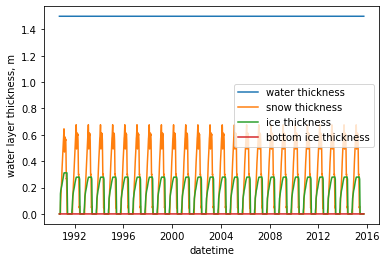

In [19]:
sns.lineplot(data=layers_burned, x='datetime', y='water layer thickness, m', label='water thickness')
#sns.lineplot(data=layers_burned, x='datetime', y='mean_mixed_layer_thickness', label='mixed layer thickness')
#sns.lineplot(data=layers_burned, x='datetime', y='mean_lower_layer_thickness', label='lower layer thickness')
sns.lineplot(data=layers_burned, x='datetime', y='snow layer thickness,  m', label='snow thickness')
sns.lineplot(data=layers_burned, x='datetime', y='ice layer thickness,   m', label='ice thickness')
sns.lineplot(data=layers_burned, x='datetime', y='bottom ice thickness,  m', label='bottom ice thickness')

In [20]:
layers_burned[(layers_burned['year']==2015) & (layers_burned['month']==1) & (layers_burned['day']==1)]

,year,month,day,hour,integration_time,"water layer thickness, m","W mixed layer thickness, m","E mixed layer thickness, m","S mixed layer thickness, m","N mixed layer thickness, m",...,"S lower layer thickness, m","N lower layer thickness, m","ice layer thickness, m","snow layer thickness, m","bottom ice thickness, m","reservoir volume, m**3","volume deficit (accumulated), m**3",datetime,mean_mixed_layer_thickness,mean_lower_layer_thickness
8857,2015,1,1,12.0,212592.0,1.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.2274,0.4617,0.0,719.6,0.0,2015-01-01,0.0,0.0


<AxesSubplot:xlabel='datetime', ylabel='t_water'>

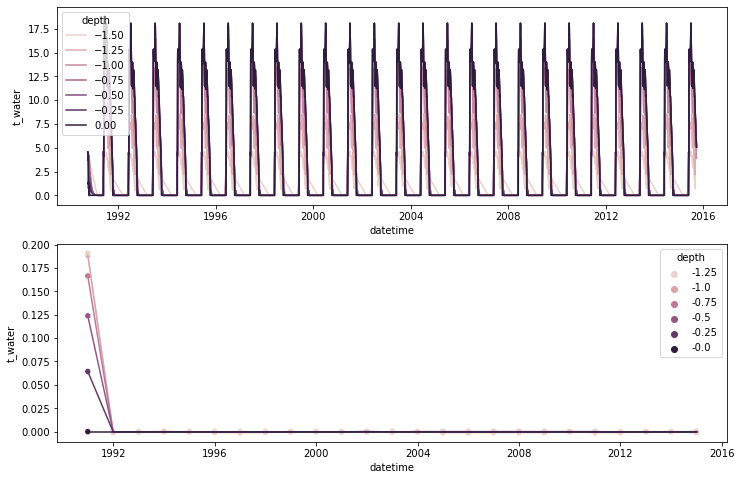

In [21]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=twater_burned[twater_burned['t_water']!=-999], x='datetime', y='t_water', hue = 'depth', ax=axes[0])
sns.lineplot(data=twater_burned[(twater_burned['t_water']!=-999) & (twater_burned['month']==1) & (twater_burned['day']==1)], 
             x='datetime', y='t_water', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=twater_burned[(twater_burned['t_water']!=-999) & (twater_burned['month']==1) & (twater_burned['day']==1)], 
             x='datetime', y='t_water', hue = 'depth', ax=axes[1])

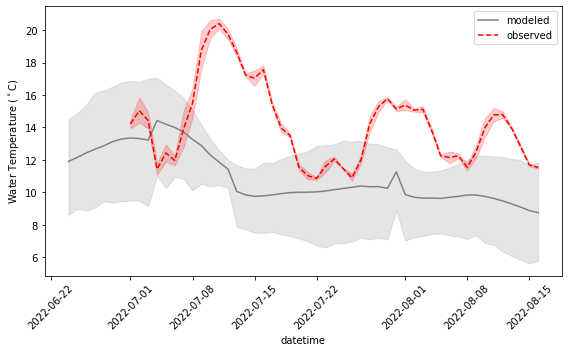

In [22]:
twater_burned_spin_comp = twater_burned.copy()
twater_burned_spin_comp['datetime'] = twater_burned_spin_comp['datetime'] +  pd.to_timedelta(7*365, unit = 'D')
twater_burned_spin_comp = twater_burned_spin_comp.loc[(twater_burned_spin_comp['datetime']>=min_bu_co2_date) & (twater_burned_spin_comp['datetime']<=max_bu_co2_date)]

fig, axes=plt.subplots(figsize=(8,5), sharex=True)

sns.lineplot(data=twater_burned_spin_comp[twater_burned_spin_comp['t_water']!=-999], x='datetime', y='t_water', label='modeled', color = 'grey')
sns.lineplot(data=burned_co2_obs, x='Date', y='WaterTemp_degC', color = 'red', linestyle = '--', label='observed')

axes.set_ylabel('Water Temperature ($^\circ$C)')

plt.xticks(rotation = 45)

fig.tight_layout()
plt.savefig('figures/burned_twater_spinup.jpg', dpi=300)

In [23]:
twater_burned[(twater_burned['t_water']!=-999) & (twater_burned['year']==2015) & (twater_burned['month']==1) & (twater_burned['day']==1)]

,year,month,day,hour,integration_time,depth,t_water,datetime
61999,2015,1,1,12.0,8858.0,-0.00,-1.580816e-13,2015-01-01
62000,2015,1,1,12.0,8858.0,-0.25,-1.545305e-04,2015-01-01
62001,2015,1,1,12.0,8858.0,-0.50,-5.307951e-06,2015-01-01
62002,2015,1,1,12.0,8858.0,-0.75,-5.916071e-06,2015-01-01
62003,2015,1,1,12.0,8858.0,-1.00,-8.431065e-06,2015-01-01
62004,2015,1,1,12.0,8858.0,-1.25,-1.098285e-03,2015-01-01


<AxesSubplot:xlabel='datetime', ylabel='sal_water'>

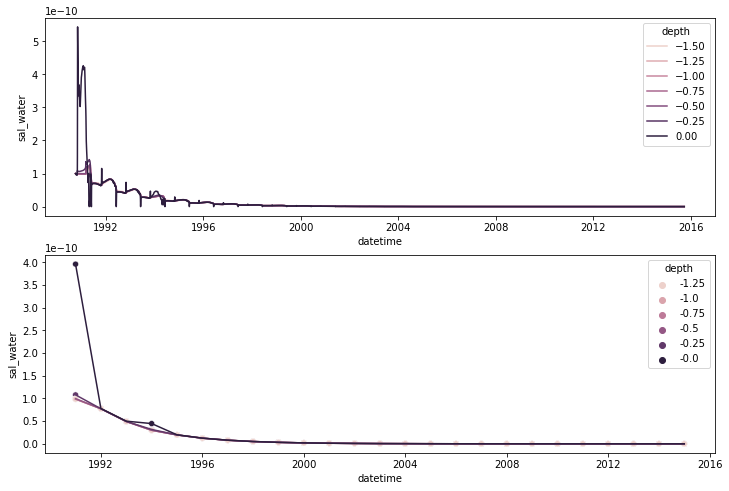

In [24]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=sal_water_burned[sal_water_burned['sal_water']!=-999], x='datetime', y='sal_water', hue = 'depth', ax=axes[0])
sns.lineplot(data=sal_water_burned[(sal_water_burned['sal_water']!=-999) & (sal_water_burned['month']==1) & (sal_water_burned['day']==1)], 
             x='datetime', y='sal_water', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=sal_water_burned[(sal_water_burned['sal_water']!=-999) & (sal_water_burned['month']==1) & (sal_water_burned['day']==1)], 
             x='datetime', y='sal_water', hue = 'depth', ax=axes[1])

In [25]:
sal_water_burned[(sal_water_burned['sal_water']!=-999) & (sal_water_burned['year']==2015) & (sal_water_burned['month']==1) & (sal_water_burned['day']==1)]

,year,month,day,hour,integration_time,depth,sal_water,datetime
61999,2015,1,1,12.0,8858.0,-0.00,2.370040e-15,2015-01-01
62000,2015,1,1,12.0,8858.0,-0.25,2.243041e-15,2015-01-01
62001,2015,1,1,12.0,8858.0,-0.50,2.236334e-15,2015-01-01
62002,2015,1,1,12.0,8858.0,-0.75,2.235843e-15,2015-01-01
62003,2015,1,1,12.0,8858.0,-1.00,2.235464e-15,2015-01-01
62004,2015,1,1,12.0,8858.0,-1.25,2.235277e-15,2015-01-01


<AxesSubplot:xlabel='datetime', ylabel='t_soil'>

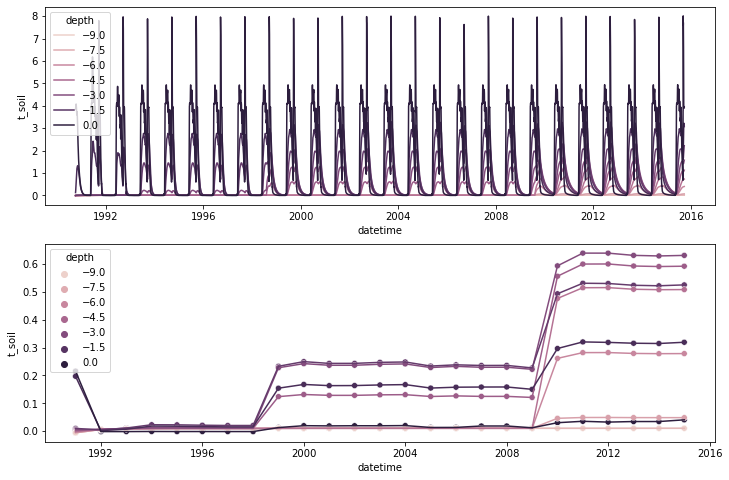

In [26]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=tsoil_burned[tsoil_burned['t_soil']!=-999], x='datetime', y='t_soil', hue = 'depth', ax=axes[0])
sns.lineplot(data=tsoil_burned[(tsoil_burned['t_soil']!=-999) & (tsoil_burned['month']==1) & (tsoil_burned['day']==1)], 
             x='datetime', y='t_soil', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=tsoil_burned[(tsoil_burned['t_soil']!=-999) & (tsoil_burned['month']==1) & (tsoil_burned['day']==1)], 
             x='datetime', y='t_soil', hue = 'depth', ax=axes[1])

In [27]:
tsoil_burned[(tsoil_burned['t_soil']!=-999) & (tsoil_burned['year']==2015) & (tsoil_burned['month']==1) & (tsoil_burned['day']==1)]

,year,month,day,hour,integration_time,depth,t_soil,datetime
97427,2015,1,1,12.0,8858.0,-0.0,0.0404,2015-01-01
97428,2015,1,1,12.0,8858.0,-1.0,0.3190,2015-01-01
97429,2015,1,1,12.0,8858.0,-2.0,0.5250,2015-01-01
97430,2015,1,1,12.0,8858.0,-3.0,0.6309,2015-01-01
97431,2015,1,1,12.0,8858.0,-4.0,0.5921,2015-01-01
97432,2015,1,1,12.0,8858.0,-5.0,0.5082,2015-01-01
97433,2015,1,1,12.0,8858.0,-6.0,0.2783,2015-01-01
97434,2015,1,1,12.0,8858.0,-7.0,0.0483,2015-01-01
97435,2015,1,1,12.0,8858.0,-8.0,0.0100,2015-01-01
97436,2015,1,1,12.0,8858.0,-9.0,0.0100,2015-01-01


<AxesSubplot:xlabel='datetime', ylabel='ch4'>

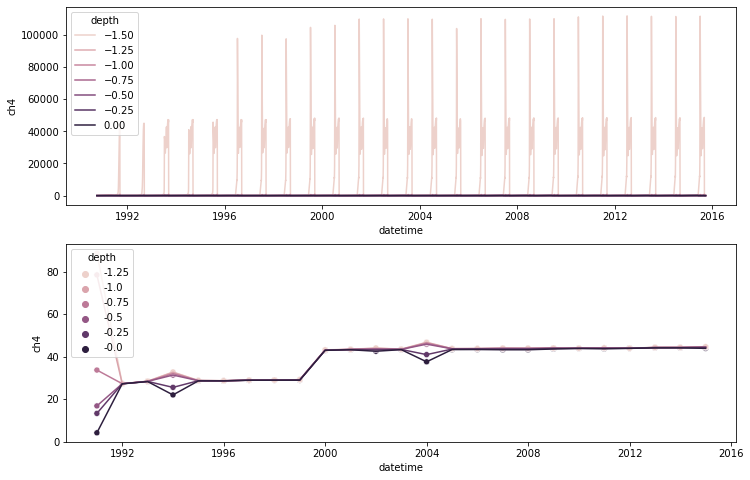

In [28]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=ch4_burned[ch4_burned['ch4']!=-999], x='datetime', y='ch4', hue = 'depth', ax=axes[0])
sns.lineplot(data=ch4_burned[(ch4_burned['ch4']!=-999) & (ch4_burned['month']==1) & (ch4_burned['day']==1)], 
             x='datetime', y='ch4', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=ch4_burned[(ch4_burned['ch4']!=-999) & (ch4_burned['month']==1) & (ch4_burned['day']==1)], 
             x='datetime', y='ch4', hue = 'depth', ax=axes[1])

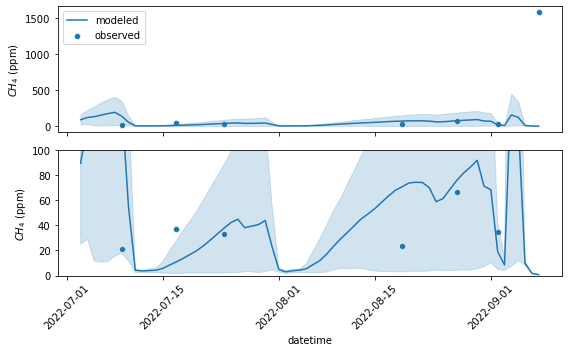

In [29]:
ch4_burned_spin_comp = ch4_burned.copy()
ch4_burned_spin_comp['datetime'] = ch4_burned_spin_comp['datetime'] +  pd.to_timedelta(7*365, unit = 'D')
ch4_burned_spin_comp = ch4_burned_spin_comp.loc[(ch4_burned_spin_comp['datetime']>=min_ch4_date) & (ch4_burned_spin_comp['datetime']<=max_ch4_date)]

fig, axes=plt.subplots(2, 1,figsize=(8,5), sharex=True)

sns.lineplot(data=ch4_burned_spin_comp[(ch4_burned_spin_comp['ch4']!=-999) & (ch4_burned_spin_comp['depth']!=-1.5)], 
            x='datetime', y='ch4', label='modeled', ax = axes[0])
sns.scatterplot(data=ch4_obs[ch4_obs['sample']=='15B_FP'], x='date', y='CH4_ppm', label='observed', ax = axes[0])

sns.lineplot(data=ch4_burned_spin_comp[(ch4_burned_spin_comp['ch4']!=-999) & (ch4_burned_spin_comp['depth']!=-1.5)], 
            x='datetime', y='ch4', ax = axes[1])
sns.scatterplot(data=ch4_obs[ch4_obs['sample']=='15B_FP'], x='date', y='CH4_ppm', ax = axes[1])

axes[0].set_ylabel('$CH_4$ (ppm)')
axes[1].set_ylabel('$CH_4$ (ppm)')

axes[1].set_ylim(0,100)
plt.xticks(rotation = 45)
fig.tight_layout()
plt.savefig('figures/burned_CH4_spinup.jpg', dpi=300)

In [30]:
ch4_burned['ch4_mol/m3'] = (ch4_burned['ch4']/1000) * (1/16.05)

In [31]:
ch4_burned[(ch4_burned['ch4']!=-999) & (ch4_burned['year']==2015) & (ch4_burned['month']==1) & (ch4_burned['day']==1)]

,year,month,day,hour,integration_time,depth,ch4,datetime,ch4_mol/m3
61999,2015,1,1,12.0,8858.0,-0.00,43.898757,2015-01-01,0.002735
62000,2015,1,1,12.0,8858.0,-0.25,44.269923,2015-01-01,0.002758
62001,2015,1,1,12.0,8858.0,-0.50,44.488112,2015-01-01,0.002772
62002,2015,1,1,12.0,8858.0,-0.75,44.524377,2015-01-01,0.002774
62003,2015,1,1,12.0,8858.0,-1.00,44.582440,2015-01-01,0.002778
62004,2015,1,1,12.0,8858.0,-1.25,44.660209,2015-01-01,0.002783


<AxesSubplot:xlabel='datetime', ylabel='co2'>

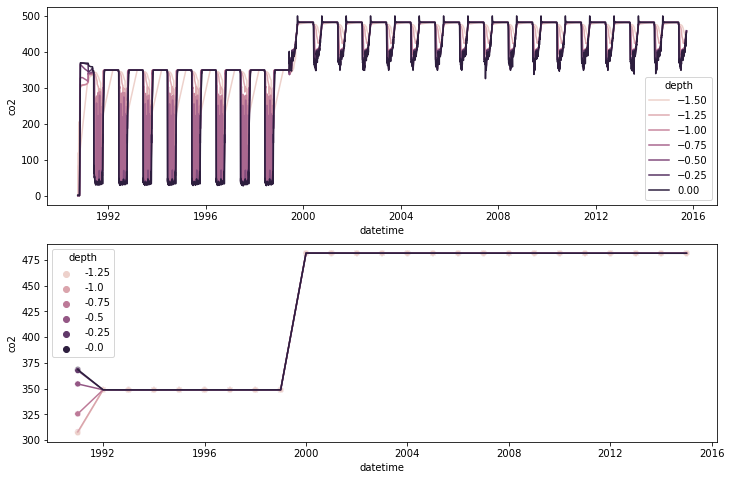

In [32]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=co2_burned[co2_burned['co2']!=-999], x='datetime', y='co2', hue = 'depth', ax=axes[0])
sns.lineplot(data=co2_burned[(co2_burned['co2']!=-999) & (co2_burned['month']==1) & (co2_burned['day']==1)], 
             x='datetime', y='co2', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=co2_burned[(co2_burned['co2']!=-999) & (co2_burned['month']==1) & (co2_burned['day']==1)], 
             x='datetime', y='co2', hue = 'depth', ax=axes[1])

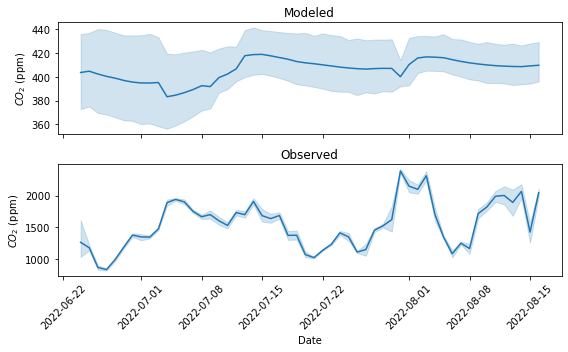

In [33]:
co2_burned_spin_comp = co2_burned.copy()
co2_burned_spin_comp['datetime'] = co2_burned_spin_comp['datetime'] +  pd.to_timedelta(7*365, unit = 'D')
co2_burned_spin_comp = co2_burned_spin_comp.loc[(co2_burned_spin_comp['datetime']>=min_bu_co2_date) & (co2_burned_spin_comp['datetime']<=max_bu_co2_date)]

fig, axes=plt.subplots(2,1,figsize=(8,5), sharex=True)

sns.lineplot(data=co2_burned_spin_comp[co2_burned_spin_comp['co2']!=-999], x='datetime', y='co2', ax = axes[0])
sns.lineplot(data=burned_co2_obs, x='Date', y='CO2_High_ppm', ax = axes[1])

axes[0].set_ylabel('$CO_2$ (ppm)')
axes[1].set_ylabel('$CO_2$ (ppm)')

axes[0].set_title('Modeled')
axes[1].set_title('Observed')
plt.xticks(rotation = 45)
fig.tight_layout()
plt.savefig('figures/burned_CO2_spinup.jpg', dpi=300)

In [34]:
burned_co2_obs.columns

Index(['TIMESTAMP', 'Date', 'Time', 'Battery_Voltage_Avg', 'PTemp_Avg_degC',
       'CO2_High_ppm', 'CO2_High_RA_ppm', 'WaterTemp_degC', 'PAR'],
      dtype='object')

In [35]:
co2_burned['co2_mol/m3'] = (co2_burned['co2']/1000) * (1/44.01)

In [36]:
co2_burned[(co2_burned['co2']!=-999) & (co2_burned['year']==2010) & (co2_burned['month']==1) & (co2_burned['day']==1)]

,year,month,day,hour,integration_time,depth,co2,datetime,co2_mol/m3
49217,2010,1,1,12.0,7032.0,-0.00,481.451327,2010-01-01,0.01094
49218,2010,1,1,12.0,7032.0,-0.25,481.451581,2010-01-01,0.01094
49219,2010,1,1,12.0,7032.0,-0.50,481.451345,2010-01-01,0.01094
49220,2010,1,1,12.0,7032.0,-0.75,481.451336,2010-01-01,0.01094
49221,2010,1,1,12.0,7032.0,-1.00,481.451340,2010-01-01,0.01094
49222,2010,1,1,12.0,7032.0,-1.25,481.451360,2010-01-01,0.01094


<AxesSubplot:xlabel='datetime', ylabel='do'>

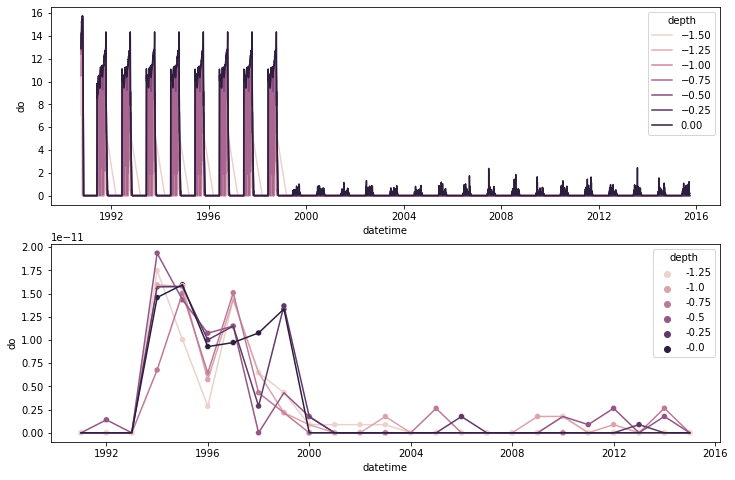

In [37]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=do_burned[do_burned['do']!=-999], x='datetime', y='do', hue = 'depth', ax=axes[0])
sns.lineplot(data=do_burned[(do_burned['do']!=-999) & (do_burned['month']==1) & (do_burned['day']==1)], 
             x='datetime', y='do', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=do_burned[(do_burned['do']!=-999) & (do_burned['month']==1) & (do_burned['day']==1)], 
             x='datetime', y='do', hue = 'depth', ax=axes[1])

In [38]:
do_burned['do_mol/m3'] = (do_burned['do']/1000) * (1/32)

In [39]:
do_burned[(do_burned['do']!=-999) & (do_burned['year']==2015) & (do_burned['month']==1) & (do_burned['day']==1)]

,year,month,day,hour,integration_time,depth,do,datetime,do_mol/m3
61999,2015,1,1,12.0,8858.0,-0.00,3.200000e-19,2015-01-01,1.000000e-23
62000,2015,1,1,12.0,8858.0,-0.25,0.000000e+00,2015-01-01,0.000000e+00
62001,2015,1,1,12.0,8858.0,-0.50,0.000000e+00,2015-01-01,0.000000e+00
62002,2015,1,1,12.0,8858.0,-0.75,0.000000e+00,2015-01-01,0.000000e+00
62003,2015,1,1,12.0,8858.0,-1.00,0.000000e+00,2015-01-01,0.000000e+00
62004,2015,1,1,12.0,8858.0,-1.25,0.000000e+00,2015-01-01,0.000000e+00


<AxesSubplot:xlabel='datetime', ylabel='po'>

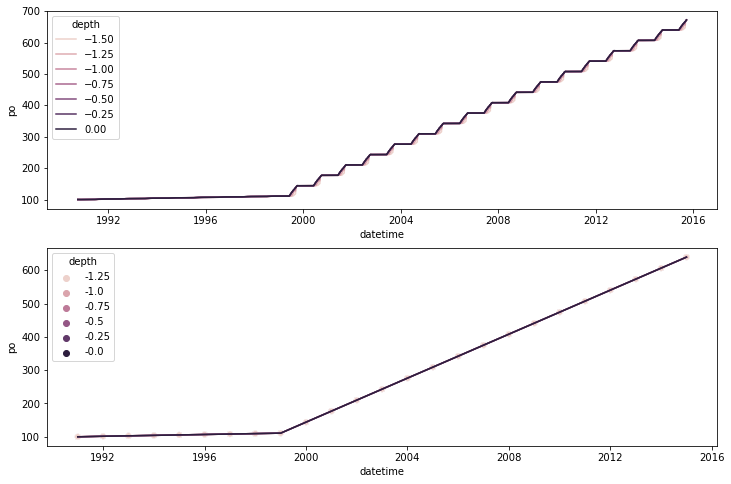

In [40]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=po_burned[po_burned['po']!=-999], x='datetime', y='po', hue = 'depth', ax=axes[0])
sns.lineplot(data=po_burned[(po_burned['po']!=-999) & (po_burned['month']==1) & (po_burned['day']==1)], 
             x='datetime', y='po', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=po_burned[(po_burned['po']!=-999) & (po_burned['month']==1) & (po_burned['day']==1)], 
             x='datetime', y='po', hue = 'depth', ax=axes[1])

In [41]:
po_burned[(po_burned['po']!=-999) & (po_burned['year']==2000) & (po_burned['month']==1) & (po_burned['day']==1)]

,year,month,day,hour,integration_time,depth,po,datetime
23646,2000,1,1,12.0,3379.0,-0.00,143.949823,2000-01-01
23647,2000,1,1,12.0,3379.0,-0.25,143.949823,2000-01-01
23648,2000,1,1,12.0,3379.0,-0.50,143.949823,2000-01-01
23649,2000,1,1,12.0,3379.0,-0.75,143.949823,2000-01-01
23650,2000,1,1,12.0,3379.0,-1.00,143.949823,2000-01-01
23651,2000,1,1,12.0,3379.0,-1.25,143.949823,2000-01-01


# Unburned Plots

<AxesSubplot:xlabel='datetime', ylabel='water layer thickness, m'>

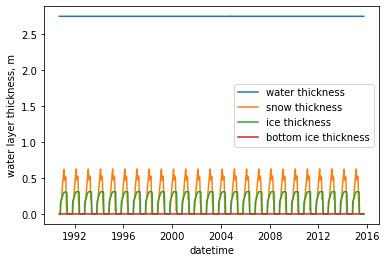

In [42]:
sns.lineplot(data=layers_unburned, x='datetime', y='water layer thickness, m', label='water thickness')
#sns.lineplot(data=layers_burned, x='datetime', y='mean_mixed_layer_thickness', label='mixed layer thickness')
#sns.lineplot(data=layers_burned, x='datetime', y='mean_lower_layer_thickness', label='lower layer thickness')
sns.lineplot(data=layers_unburned, x='datetime', y='snow layer thickness,  m', label='snow thickness')
sns.lineplot(data=layers_unburned, x='datetime', y='ice layer thickness,   m', label='ice thickness')
sns.lineplot(data=layers_unburned, x='datetime', y='bottom ice thickness,  m', label='bottom ice thickness')

In [43]:
layers_unburned[(layers_unburned['year']==2010) & (layers_unburned['month']==1) & (layers_unburned['day']==1)]

,year,month,day,hour,integration_time,"water layer thickness, m","W mixed layer thickness, m","E mixed layer thickness, m","S mixed layer thickness, m","N mixed layer thickness, m",...,"S lower layer thickness, m","N lower layer thickness, m","ice layer thickness, m","snow layer thickness, m","bottom ice thickness, m","reservoir volume, m**3","volume deficit (accumulated), m**3",datetime,mean_mixed_layer_thickness,mean_lower_layer_thickness
7031,2010,1,1,12.0,168768.0,2.75,0.0,0.0,0.0,0.0,...,0.0,0.0,0.2632,0.4285,0.0,5916.0,0.0,2010-01-01,0.0,0.0


<AxesSubplot:xlabel='datetime', ylabel='t_water'>

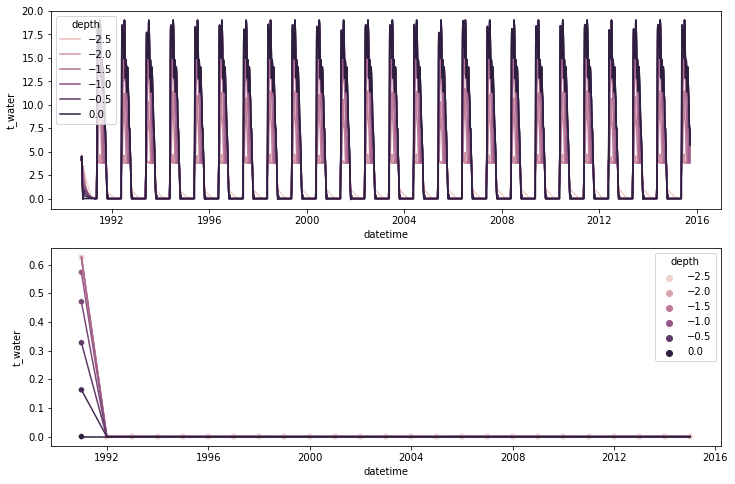

In [44]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=twater_unburned[twater_unburned['t_water']!=-999], x='datetime', y='t_water', hue = 'depth', ax=axes[0])
sns.lineplot(data=twater_unburned[(twater_unburned['t_water']!=-999) & (twater_unburned['month']==1) & (twater_unburned['day']==1)], 
             x='datetime', y='t_water', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=twater_unburned[(twater_unburned['t_water']!=-999) & (twater_unburned['month']==1) & (twater_unburned['day']==1)], 
             x='datetime', y='t_water', hue = 'depth', ax=axes[1])

<AxesSubplot:xlabel='datetime', ylabel='t_water'>

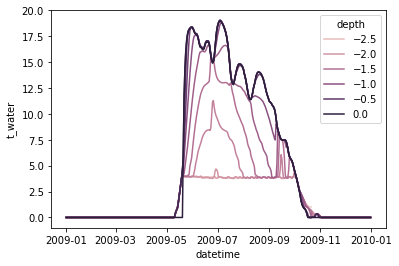

In [45]:
sns.lineplot(data=twater_unburned[(twater_unburned['t_water']!=-999)&(twater_unburned['year']==2009)], x='datetime', y='t_water', hue = 'depth')

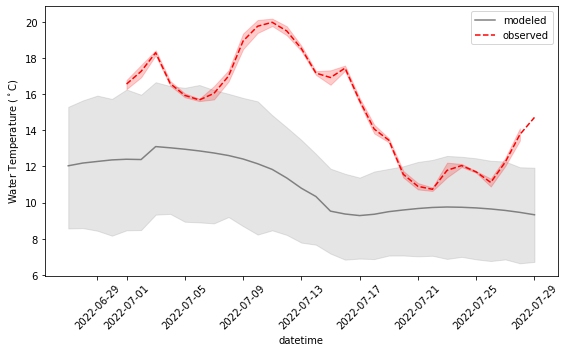

In [46]:
unburned_co2_obs['Date.1'] = pd.to_datetime(unburned_co2_obs['Date.1'])
twater_unburned_spin_comp = twater_unburned.copy()
twater_unburned_spin_comp['datetime'] = twater_unburned_spin_comp['datetime'] +  pd.to_timedelta(7*365, unit = 'D')
twater_unburned_spin_comp = twater_unburned_spin_comp.loc[(twater_unburned_spin_comp['datetime']>=min_ub_co2_date) & (twater_unburned_spin_comp['datetime']<=max_ub_co2_date)]

fig, axes=plt.subplots(figsize=(8,5), sharex=True)

sns.lineplot(data=twater_unburned_spin_comp[twater_unburned_spin_comp['t_water']!=-999], x='datetime', y='t_water', label='modeled', color = 'grey')
sns.lineplot(data=unburned_co2_obs, x='Date.1', y='WaterTemp_degC', color = 'red', linestyle = '--', label='observed')

axes.set_ylabel('Water Temperature ($^\circ$C)')

plt.xticks(rotation = 45)

fig.tight_layout()
plt.savefig('figures/unburned_twater_spinup.jpg', dpi=300)

In [47]:
twater_unburned[(twater_unburned['t_water']!=-999) & (twater_unburned['year']==2015) & (twater_unburned['month']==1) & (twater_unburned['day']==1)]

,year,month,day,hour,integration_time,depth,t_water,datetime
106284,2015,1,1,12.0,8858.0,-0.00,-1.014750e-10,2015-01-01
106285,2015,1,1,12.0,8858.0,-0.25,-8.936804e-05,2015-01-01
106286,2015,1,1,12.0,8858.0,-0.50,-6.405152e-05,2015-01-01
106287,2015,1,1,12.0,8858.0,-0.75,-4.807096e-06,2015-01-01
106288,2015,1,1,12.0,8858.0,-1.00,-8.886013e-07,2015-01-01
106289,2015,1,1,12.0,8858.0,-1.25,-1.657991e-06,2015-01-01
106290,2015,1,1,12.0,8858.0,-1.50,-8.738899e-05,2015-01-01
106291,2015,1,1,12.0,8858.0,-1.75,-9.595995e-05,2015-01-01
106292,2015,1,1,12.0,8858.0,-2.00,-8.839680e-05,2015-01-01
106293,2015,1,1,12.0,8858.0,-2.25,-9.852580e-06,2015-01-01


<AxesSubplot:xlabel='datetime', ylabel='sal_water'>

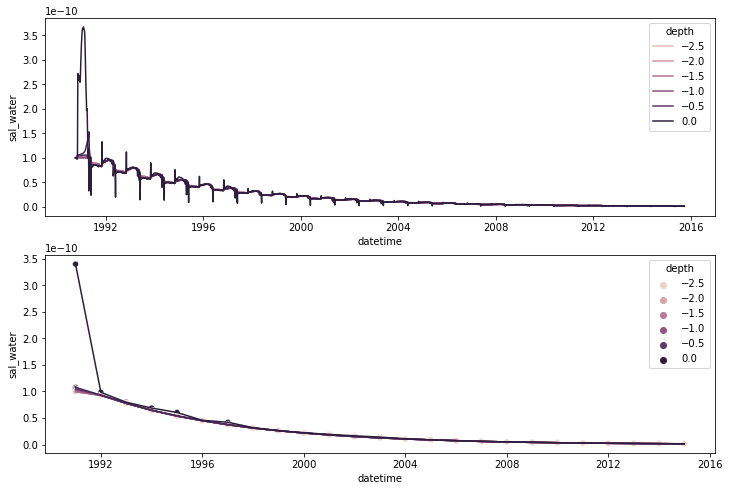

In [48]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=sal_water_unburned[sal_water_unburned['sal_water']!=-999], x='datetime', y='sal_water', hue = 'depth', ax=axes[0])
sns.lineplot(data=sal_water_unburned[(sal_water_unburned['sal_water']!=-999) & (sal_water_unburned['month']==1) & (sal_water_unburned['day']==1)], 
             x='datetime', y='sal_water', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=sal_water_unburned[(sal_water_unburned['sal_water']!=-999) & (sal_water_unburned['month']==1) & (sal_water_unburned['day']==1)], 
             x='datetime', y='sal_water', hue = 'depth', ax=axes[1])

In [49]:
sal_water_unburned[(sal_water_unburned['sal_water']!=-999) & (sal_water_unburned['year']==2015) & (sal_water_unburned['month']==1) & (sal_water_unburned['day']==1)]

,year,month,day,hour,integration_time,depth,sal_water,datetime
106284,2015,1,1,12.0,8858.0,-0.00,1.521370e-12,2015-01-01
106285,2015,1,1,12.0,8858.0,-0.25,1.385194e-12,2015-01-01
106286,2015,1,1,12.0,8858.0,-0.50,1.374493e-12,2015-01-01
106287,2015,1,1,12.0,8858.0,-0.75,1.371816e-12,2015-01-01
106288,2015,1,1,12.0,8858.0,-1.00,1.371257e-12,2015-01-01
106289,2015,1,1,12.0,8858.0,-1.25,1.371102e-12,2015-01-01
106290,2015,1,1,12.0,8858.0,-1.50,1.370924e-12,2015-01-01
106291,2015,1,1,12.0,8858.0,-1.75,1.370835e-12,2015-01-01
106292,2015,1,1,12.0,8858.0,-2.00,1.370773e-12,2015-01-01
106293,2015,1,1,12.0,8858.0,-2.25,1.370757e-12,2015-01-01


<AxesSubplot:xlabel='datetime', ylabel='t_soil'>

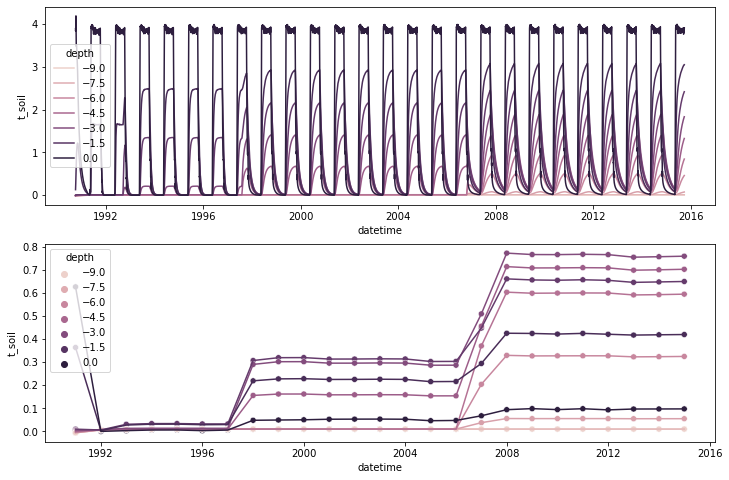

In [50]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=tsoil_unburned[tsoil_unburned['t_soil']!=-999], x='datetime', y='t_soil', hue = 'depth', ax=axes[0])
sns.lineplot(data=tsoil_unburned[(tsoil_unburned['t_soil']!=-999) & (tsoil_unburned['month']==1) & (tsoil_unburned['day']==1)], 
             x='datetime', y='t_soil', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=tsoil_unburned[(tsoil_unburned['t_soil']!=-999) & (tsoil_unburned['month']==1) & (tsoil_unburned['day']==1)], 
             x='datetime', y='t_soil', hue = 'depth', ax=axes[1])

In [51]:
tsoil_unburned[(tsoil_unburned['t_soil']!=-999) & (tsoil_unburned['year']==2015) & (tsoil_unburned['month']==1) & (tsoil_unburned['day']==1)]

,year,month,day,hour,integration_time,depth,t_soil,datetime
97427,2015,1,1,12.0,8858.0,-0.0,0.0973,2015-01-01
97428,2015,1,1,12.0,8858.0,-1.0,0.4191,2015-01-01
97429,2015,1,1,12.0,8858.0,-2.0,0.6486,2015-01-01
97430,2015,1,1,12.0,8858.0,-3.0,0.7581,2015-01-01
97431,2015,1,1,12.0,8858.0,-4.0,0.7015,2015-01-01
97432,2015,1,1,12.0,8858.0,-5.0,0.5938,2015-01-01
97433,2015,1,1,12.0,8858.0,-6.0,0.3243,2015-01-01
97434,2015,1,1,12.0,8858.0,-7.0,0.0549,2015-01-01
97435,2015,1,1,12.0,8858.0,-8.0,0.0100,2015-01-01
97436,2015,1,1,12.0,8858.0,-9.0,0.0100,2015-01-01


<AxesSubplot:xlabel='datetime', ylabel='ch4'>

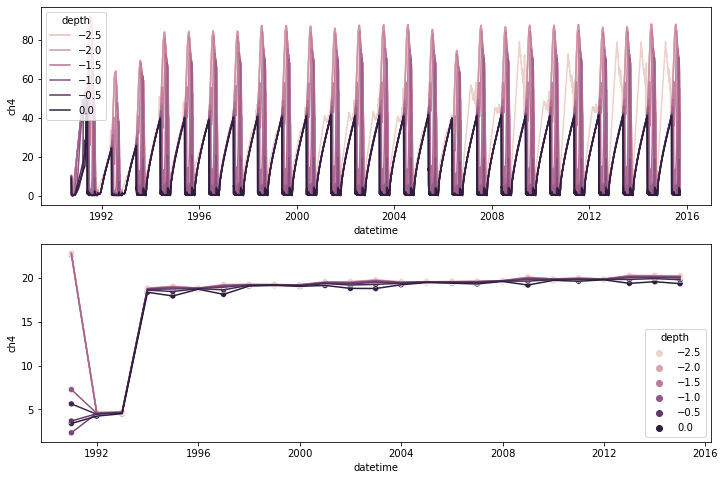

In [52]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=ch4_unburned[ch4_unburned['ch4']!=-999], x='datetime', y='ch4', hue = 'depth', ax=axes[0])
sns.lineplot(data=ch4_unburned[(ch4_unburned['ch4']!=-999) & (ch4_unburned['month']==1) & (ch4_unburned['day']==1)], 
             x='datetime', y='ch4', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=ch4_unburned[(ch4_unburned['ch4']!=-999) & (ch4_unburned['month']==1) & (ch4_unburned['day']==1)], 
             x='datetime', y='ch4', hue = 'depth', ax=axes[1])

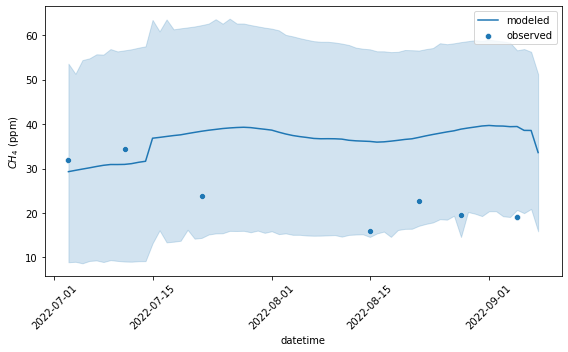

In [53]:
ch4_unburned_spin_comp = ch4_unburned.copy()
ch4_unburned_spin_comp['datetime'] = ch4_unburned_spin_comp['datetime'] +  pd.to_timedelta(7*365, unit = 'D')
ch4_unburned_spin_comp = ch4_unburned_spin_comp.loc[(ch4_unburned_spin_comp['datetime']>=min_ch4_date) & (ch4_unburned_spin_comp['datetime']<=max_ch4_date)]

fig, axes=plt.subplots(figsize=(8,5), sharex=True)

sns.lineplot(data=ch4_unburned_spin_comp[(ch4_unburned_spin_comp['ch4']!=-999) & (ch4_unburned_spin_comp['depth']!=-1.5)], 
            x='datetime', y='ch4', label='modeled')
sns.scatterplot(data=ch4_obs[ch4_obs['sample']=='UB_FP'], x='date', y='CH4_ppm', label='observed')

axes.set_ylabel('$CH_4$ (ppm)')
plt.xticks(rotation = 45)
fig.tight_layout()
plt.savefig('figures/unburned_CH4_spinup.jpg', dpi=300)

In [54]:
ch4_unburned['ch4_mol/m3'] = (ch4_unburned['ch4']/1000) * (1/16.05)

In [55]:
ch4_unburned[(ch4_unburned['ch4']!=-999) & (ch4_unburned['year']==2015) & (ch4_unburned['month']==1) & (ch4_unburned['day']==1)]

,year,month,day,hour,integration_time,depth,ch4,datetime,ch4_mol/m3
106284,2015,1,1,12.0,8858.0,-0.00,19.348074,2015-01-01,0.001205
106285,2015,1,1,12.0,8858.0,-0.25,19.796187,2015-01-01,0.001233
106286,2015,1,1,12.0,8858.0,-0.50,19.992706,2015-01-01,0.001246
106287,2015,1,1,12.0,8858.0,-0.75,20.091578,2015-01-01,0.001252
106288,2015,1,1,12.0,8858.0,-1.00,20.130985,2015-01-01,0.001254
106289,2015,1,1,12.0,8858.0,-1.25,20.149593,2015-01-01,0.001255
106290,2015,1,1,12.0,8858.0,-1.50,20.179158,2015-01-01,0.001257
106291,2015,1,1,12.0,8858.0,-1.75,20.202069,2015-01-01,0.001259
106292,2015,1,1,12.0,8858.0,-2.00,20.229162,2015-01-01,0.001260
106293,2015,1,1,12.0,8858.0,-2.25,20.241018,2015-01-01,0.001261


<AxesSubplot:xlabel='datetime', ylabel='co2'>

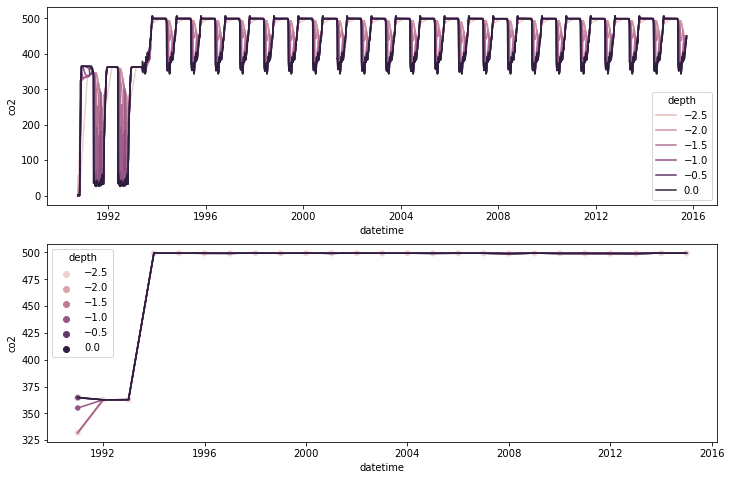

In [56]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=co2_unburned[co2_unburned['co2']!=-999], x='datetime', y='co2', hue = 'depth', ax=axes[0])
sns.lineplot(data=co2_unburned[(co2_unburned['co2']!=-999) & (co2_unburned['month']==1) & (co2_unburned['day']==1)], 
             x='datetime', y='co2', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=co2_unburned[(co2_unburned['co2']!=-999) & (co2_unburned['month']==1) & (co2_unburned['day']==1)], 
             x='datetime', y='co2', hue = 'depth', ax=axes[1])

In [57]:
unburned_co2_obs

,Date,Date.1,Time,Battery_Voltage_Avg,PTemp_degC_Avg,CO2_High_ppm,CO2_High_RA_ppm,WaterTemp_degC,PAR
0,2022-06-26 14:30:00,2022-06-26,14:30,14.55,15.05,57.87958,52.90734,NaN,NaN
1,2022-06-26 15:00:00,2022-06-26,15:00,13.50,14.21,1082.13700,910.99200,NaN,NaN
2,2022-06-26 15:30:00,2022-06-26,15:30,13.43,13.20,1196.33400,1146.56000,NaN,NaN
3,2022-06-26 16:00:00,2022-06-26,16:00,13.51,12.71,1250.88200,1214.20000,NaN,NaN
4,2022-06-26 16:30:00,2022-06-26,16:30,13.84,12.48,1273.01400,1257.22800,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1551,2022-07-28 22:00:00,2022-07-28,22:00,13.75,14.43,4505.77100,3573.20600,14.996,0.1998
1552,2022-07-28 22:30:00,2022-07-28,22:30,13.58,13.74,4666.15300,3611.34000,14.900,0.0000
1553,2022-07-28 23:00:00,2022-07-28,23:00,13.47,13.13,4770.90600,3658.30300,14.900,0.0000
1554,2022-07-28 23:30:00,2022-07-28,23:30,13.39,12.59,4812.57000,3706.10000,14.804,0.0000


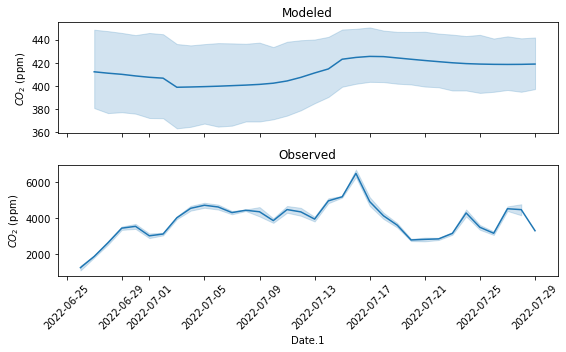

In [58]:
co2_unburned_spin_comp = co2_unburned.copy()
co2_unburned_spin_comp['datetime'] = co2_unburned_spin_comp['datetime'] +  pd.to_timedelta(7*365, unit = 'D')
co2_unburned_spin_comp = co2_unburned_spin_comp.loc[(co2_unburned_spin_comp['datetime']>=min_ub_co2_date) & (co2_unburned_spin_comp['datetime']<=max_ub_co2_date)]

fig, axes=plt.subplots(2,1,figsize=(8,5), sharex=True)

sns.lineplot(data=co2_unburned_spin_comp[co2_unburned_spin_comp['co2']!=-999], x='datetime', y='co2', ax = axes[0])
sns.lineplot(data=unburned_co2_obs, x='Date.1', y='CO2_High_ppm', ax = axes[1])

axes[0].set_ylabel('$CO_2$ (ppm)')
axes[1].set_ylabel('$CO_2$ (ppm)')

axes[0].set_title('Modeled')
axes[1].set_title('Observed')
plt.xticks(rotation = 45)

fig.tight_layout()
plt.savefig('figures/unburned_CO2_spinup.jpg', dpi=300)

In [59]:
co2_unburned['co2_mol/m3'] = (co2_unburned['co2']/1000) * (1/44.01)

In [60]:
co2_unburned[(co2_unburned['co2']!=-999) & (co2_unburned['year']==2010) & (co2_unburned['month']==1) & (co2_unburned['day']==1)]

,year,month,day,hour,integration_time,depth,co2,datetime,co2_mol/m3
84372,2010,1,1,12.0,7032.0,-0.00,499.082169,2010-01-01,0.01134
84373,2010,1,1,12.0,7032.0,-0.25,499.082172,2010-01-01,0.01134
84374,2010,1,1,12.0,7032.0,-0.50,499.082171,2010-01-01,0.01134
84375,2010,1,1,12.0,7032.0,-0.75,499.082225,2010-01-01,0.01134
84376,2010,1,1,12.0,7032.0,-1.00,499.082242,2010-01-01,0.01134
84377,2010,1,1,12.0,7032.0,-1.25,499.082302,2010-01-01,0.01134
84378,2010,1,1,12.0,7032.0,-1.50,499.082178,2010-01-01,0.01134
84379,2010,1,1,12.0,7032.0,-1.75,499.082172,2010-01-01,0.01134
84380,2010,1,1,12.0,7032.0,-2.00,499.082174,2010-01-01,0.01134
84381,2010,1,1,12.0,7032.0,-2.25,499.082182,2010-01-01,0.01134


<AxesSubplot:xlabel='datetime', ylabel='do'>

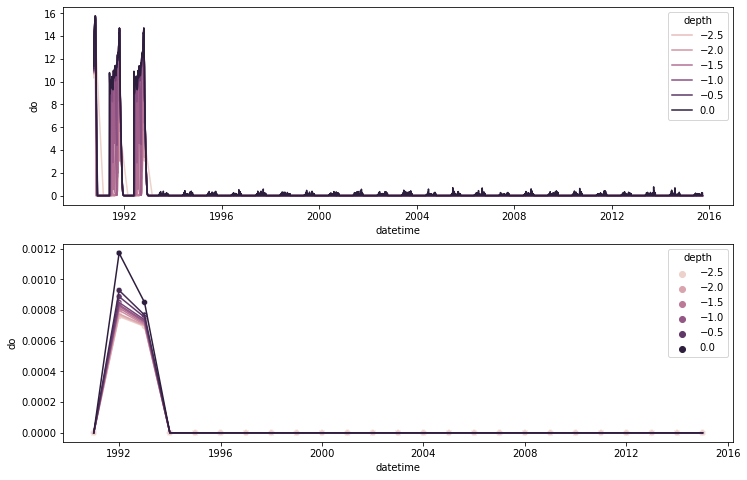

In [61]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=do_unburned[do_unburned['do']!=-999], x='datetime', y='do', hue = 'depth', ax=axes[0])
sns.lineplot(data=do_unburned[(do_unburned['do']!=-999) & (do_unburned['month']==1) & (do_unburned['day']==1)], 
             x='datetime', y='do', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=do_unburned[(do_unburned['do']!=-999) & (do_unburned['month']==1) & (do_unburned['day']==1)], 
             x='datetime', y='do', hue = 'depth', ax=axes[1])

In [62]:
do_unburned['do_mol/m3'] = (do_unburned['do']/1000) * (1/32)

In [63]:
do_unburned[(do_unburned['do']!=-999) & (do_unburned['year']==2010) & (do_unburned['month']==1) & (do_unburned['day']==1)]

,year,month,day,hour,integration_time,depth,do,datetime,do_mol/m3
84372,2010,1,1,12.0,7032.0,-0.00,3.200000e-19,2010-01-01,1.000000e-23
84373,2010,1,1,12.0,7032.0,-0.25,0.000000e+00,2010-01-01,0.000000e+00
84374,2010,1,1,12.0,7032.0,-0.50,5.076730e-13,2010-01-01,1.586478e-17
84375,2010,1,1,12.0,7032.0,-0.75,1.691434e-12,2010-01-01,5.285731e-17
84376,2010,1,1,12.0,7032.0,-1.00,0.000000e+00,2010-01-01,0.000000e+00
84377,2010,1,1,12.0,7032.0,-1.25,3.384898e-13,2010-01-01,1.057781e-17
84378,2010,1,1,12.0,7032.0,-1.50,0.000000e+00,2010-01-01,0.000000e+00
84379,2010,1,1,12.0,7032.0,-1.75,0.000000e+00,2010-01-01,0.000000e+00
84380,2010,1,1,12.0,7032.0,-2.00,0.000000e+00,2010-01-01,0.000000e+00
84381,2010,1,1,12.0,7032.0,-2.25,1.353435e-12,2010-01-01,4.229483e-17
